# Time to get your hands dirty. Black-hole binary formation channels with gaussian mixtures.
Tasks
- Load this file (np.load) and complete a quick exploration of the data. How many modes do you think you see?

- We'll use sklearn.mixture.GaussianMixture. You first need to define the model (instance of a class), and then train it on the data using the fit method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

Note. We'll do a more formal introduction to scikit-learn in one of the next lectures. Today's exercise is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens all the time in research...

- Complete the fit 10 times with N=1...10 Gaussians.
Note: sklearn by default will use the so-called Expectation-Maximization algorithm, which is one of the many great things in data science we don't have time to study in this class.

- For each of this fits, compute the AIC (easy! It's an attribute of the trained model!). Plot N vs AIC: which model is preferred?

- Plot the preferred solution on top of the input data. You should get a very nice fit!
- Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture 

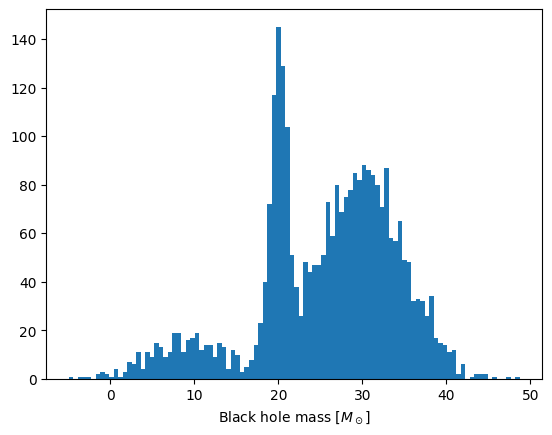

In [2]:
# Load black hole mass data from file
data=np.load('formationchannels.npy')

plt.hist(data, bins=100)
plt.xlabel("Black hole mass $[M_\odot]$")
plt.show()

In [3]:
# Fit a Gaussian Mixture Model (GMM) with 3 components
gm=GaussianMixture(n_components=3, random_state=0).fit(data)
gm.score(data) # Compute the log-likelihood of the data under the fitted GMM model


np.float64(-3.4012388398828977)

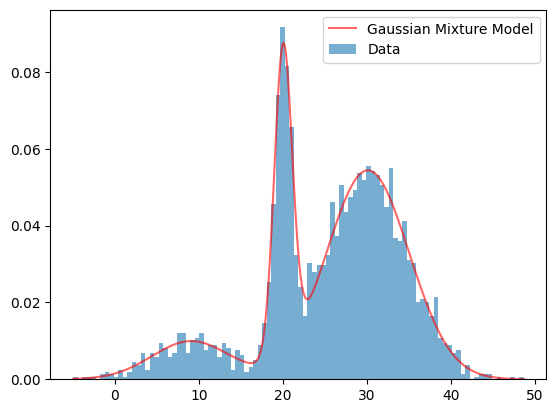

In [4]:
x = np.linspace(data.min(), data.max(), 1000).reshape(-1, 1)
pdf = np.exp(gm.score_samples(x)) # gm.score_samples(x) returns the log of the pdf for each point
plt.plot(x.ravel(), pdf, '-r', label="Gaussian Mixture Model", alpha=0.6) 
plt.hist(data, bins=100, density=True, alpha=0.6, label="Data")
plt.legend()
plt.show()

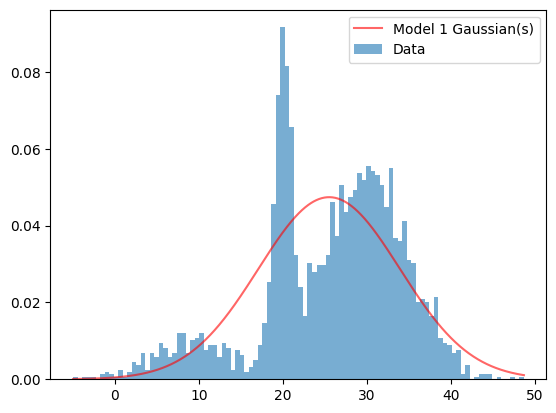

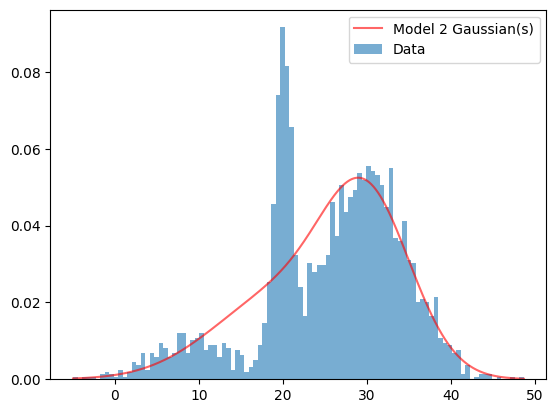

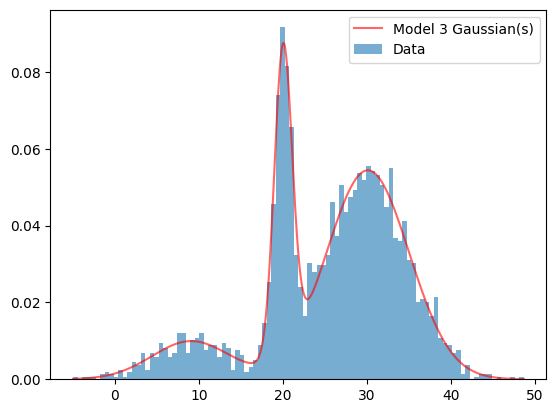

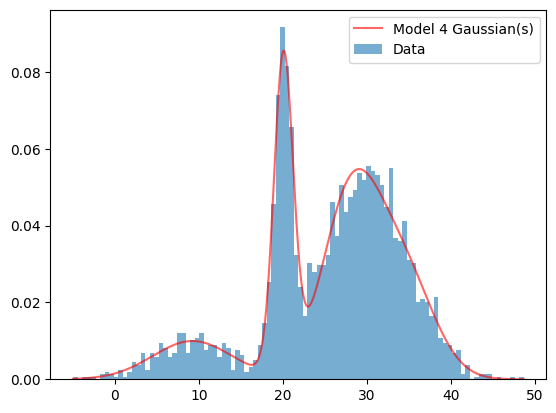

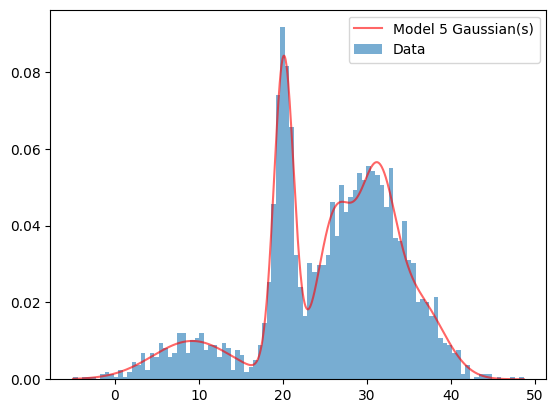

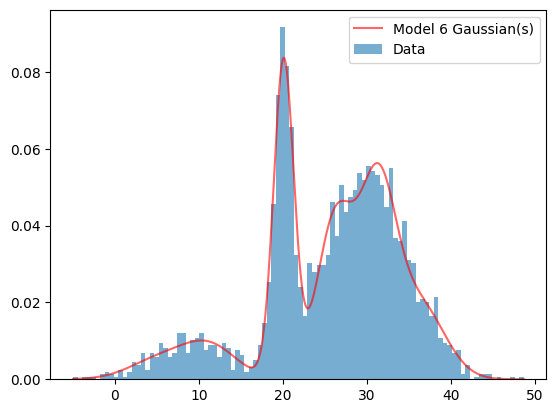

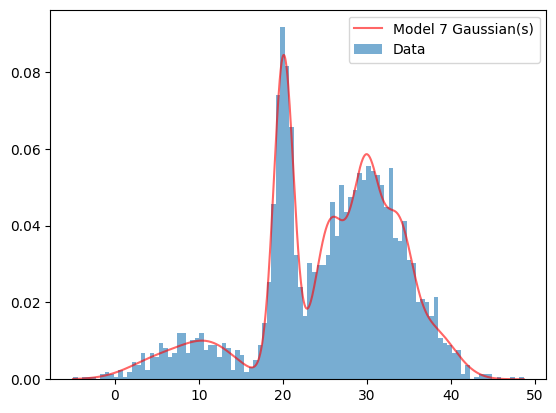

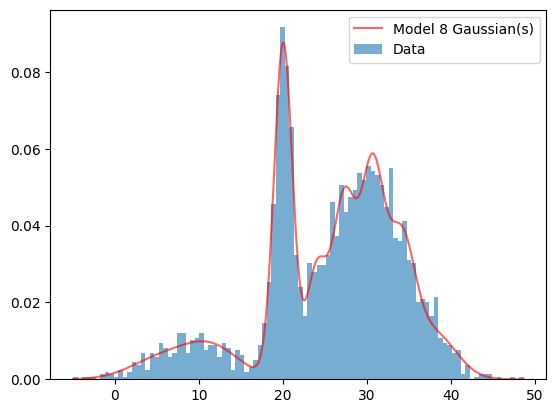

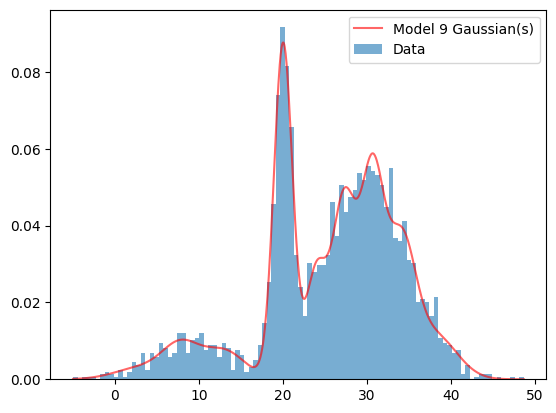

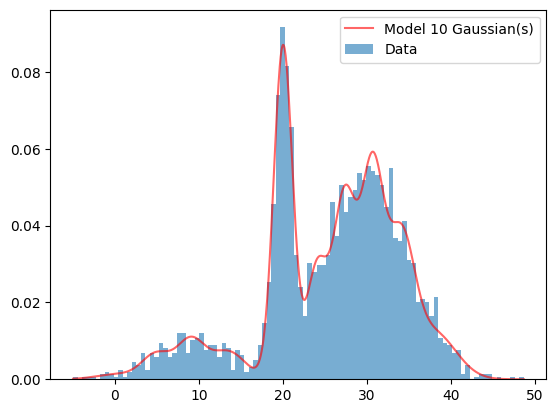

In [7]:
AIC=[]
# Evaluate AIC for models with 1 to 10 Gaussian components
for i in range (10):
    gm=GaussianMixture(n_components=i+1, random_state=0)
    gm.fit(data)
    AIC.append(gm.aic(data))
    x = np.linspace(data.min(), data.max(), 1000).reshape(-1, 1)
    pdf = np.exp(gm.score_samples(x))
    plt.plot(x.ravel(), pdf, '-r', alpha=0.6, label=f"Model {i+1} Gaussian(s)")
    plt.hist(data, bins=100, density=True, alpha=0.6, label="Data")
    plt.legend()
    plt.show()
    plt.close()
    

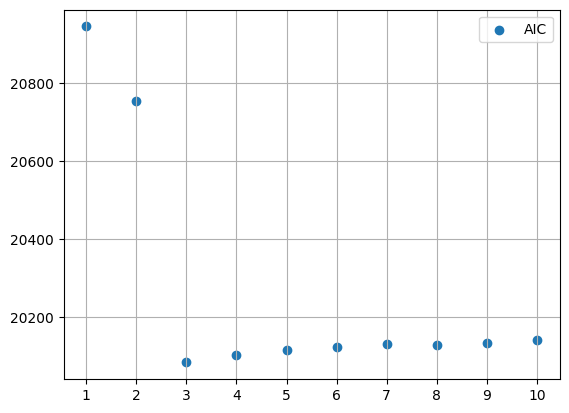

In [ ]:
# Plot AIC to find best number of components
plt.scatter(range(1,11), AIC, label="AIC")
plt.xticks(range(1, 11))
plt.grid(True)
plt.legend()
plt.show()

In [9]:
best_N=np.argmin(AIC)+1
print("The best model is with", best_N, "gaussians")

The best model is with 3 gaussians


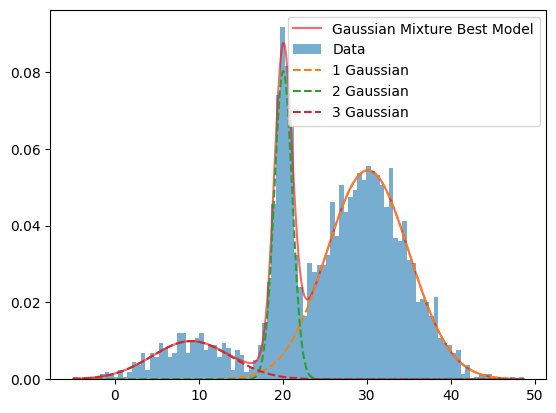

In [10]:
gm=GaussianMixture(n_components=best_N, random_state=0).fit(data) # Fit GMM with the best number of component
x = np.linspace(data.min(), data.max(), 1000).reshape(-1, 1)
pdf = np.exp(gm.score_samples(x))
plt.plot(x.ravel(), pdf, '-r', label="Gaussian Mixture Best Model", alpha=0.6) 
plt.hist(data, bins=100, density=True, alpha=0.6, label="Data")
# Extract weights, means, and covariances of each Gaussian component
weights = gm.weights_
means = gm.means_.ravel()  
covariances = gm.covariances_.ravel()  
# Plot each Gaussian component separately for visualization
for i in range(3):  
    single_gauss = weights[i] * np.exp(-0.5 * ((x - means[i])**2 / covariances[i])) / np.sqrt(2 * np.pi * covariances[i])
    plt.plot(x.ravel(), single_gauss, '--', label=f"{i+1} Gaussian")

plt.legend()
plt.show()

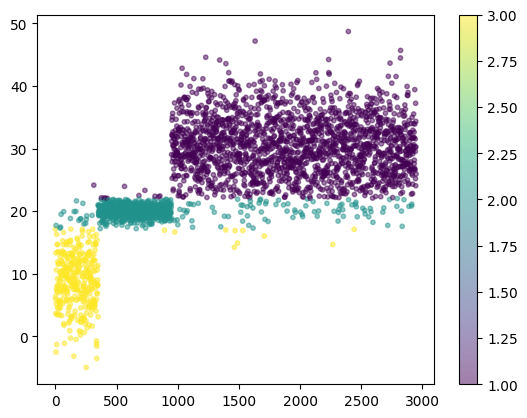

In [12]:
gm=GaussianMixture(n_components=best_N, random_state=0)
gm.fit(data)
labels=gm.predict(data) # Predict which Gaussian component each data point most likely belongs to

plt.scatter(range(len(data)),data,  c=labels+1 , cmap="viridis", s=10, alpha=0.5) # Scatter plot of the data, colored by assigned component
plt.colorbar()
plt.show()

